In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# 27.7ベータとリターン
以下の数式を用いて$\alpha$, $\beta$, $R^2$の理論値と実際の値とを求める

$$
\beta_i = \frac{Cov(r_i,r_M)}{Var(r_M)} = \frac{\rho \sigma_1 \sigma_M}{\sigma_m^2} = \frac{\rho \sigma_i}{\sigma_M}
$$

$$
\begin{align*}
r_{i,t} = \alpha_i + \beta_i r_{Mt}
\end{align*}
$$

$$
\begin{align*}
&\alpha_i = E(r_M) - \beta_i E(r_i)\\
&\beta_i = \frac{\rho \sigma_i}{\sigma_M}\\   
&R^2 = \rho ^2\\
\end{align*}
$$

In [6]:
#初期設定
mu_i = 0.06 #株式iの平均
sigma_i = 0.22 #株式iの標準偏差
mu_m = 0.1#マーケットの平均
sigma_m = 0.15 #マーケットの標準偏差
rho = 0.3 #iとMの相関

In [5]:
#予想beta
betai_est = rho * sigma_i / sigme_m
#予想alpha
alphai_est = mu_i - betai_est*mu_m
#予想R^2
R2_est = rho**2

In [40]:
#乱数発生(27.3参照)
Z1 = np.random.randn(60)
Z3 = np.random.randn(60)
Z2 = rho * Z1 + np.sqrt(1-rho**2)*Z3
ret = mu_i + sigma_i*Z1*np.sqrt(1/12)
market = mu_m + sigma_m*Z2*np.sqrt(1/12)

df = pd.DataFrame({"Z1":Z1,
                  "Z2":Z2,
                  "return":ret,
                  "market":market},
                 index = range(1,61))

In [41]:
#df

In [42]:
model = LinearRegression()
model.fit(ret.reshape([-1,1]),market)
alphai = model.intercept_
betai = model.coef_[0]
R2 = model.score(ret.reshape([-1,1]),market)

In [43]:
print("αの予想値: ", alphai_est,"  実際のα: ", alphai)
print("βの予想値: ", betai_est, "  実際のβ: ",betai)
print("R^2の予想値: ", R2_est, "  実際のR^2: ", R2)

αの予想値:  0.015999999999999986   実際のα:  0.0803873100252558
βの予想値:  0.44000000000000006   実際のβ:  0.2924086778516175
R^2の予想値:  0.09   実際のR^2:  0.2137267480173688


実行するたびに実際の値が変わる。理論値と近いこともあれば、全く離れていることもある。

### シミュレーションを50回行う

In [75]:
betas = []
for i in range(50):
    Z1 = np.random.randn(60)
    Z3 = np.random.randn(60)
    Z2 = rho * Z1 + np.sqrt(1-rho**2)*Z3
    ret = mu_i + sigma_i*Z1*np.sqrt(1/12)
    market = mu_m + sigma_m*Z2*np.sqrt(1/12)
    model.fit(ret.reshape([-1,1]),market)
    #alphai = model.intercept_
    betai = model.coef_[0]
    #R2 = model.score(ret.reshape([-1,1]),market)
    betas.append(betai)

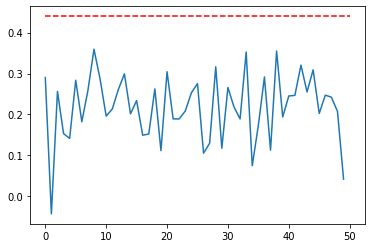

In [76]:
plt.plot(betas)
plt.hlines([betai_est],0,50,color="red",linestyle="dashed")